<a href="https://colab.research.google.com/github/zaaraquadrii/Zaara_Projects_Labs/blob/main/Module_01_Lab_01_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install wikipedia

import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd

# Part 1: Features of text
How do we apply machine learning on text? We can't directly use the text as input to our algorithms. We need to convert them to features. In this notebook, we will explore a simple way of converting text to features.

Let us download a few documents off Wikipedia.

In [ ]:
topic1 = 'Pizza'
topic2 = 'Rap music'
topic3 = 'Rapp musik'

wikipedia.set_lang('en')

eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content

wikipedia.set_lang('de')

de1 = wikipedia.page(topic1).content
de2 = wikipedia.page(topic3).content

In [ ]:
de1

'Vorlage:Infobox Gemeinde in Frankreich/Wartung/abweichendes Wappen in Wikidata\n\nNizza (französisch Nice [nis], nissart Niça/Nissa) ist eine französische Großstadt mit 353.701 Einwohnern an der Mittelmeerküste (Côte d’Azur) im Département Alpes-Maritimes in der Region Provence-Alpes-Côte d’Azur. Seit Juli 2021 ist Nizza als „Winterurlaubsstadt an der Riviera“ Teil des UNESCO-Weltkulturerbes.\nNizza ist bevölkerungsmäßig die fünftgrößte Stadt Frankreichs und nach Marseille die zweitgrößte Stadt der provenzalischen Region Provence-Alpes-Côte d’Azur. Nizza ist Sitz der Präfektur des Départements Alpes-Maritimes. Sie liegt zwischen Cannes und dem Fürstentum Monaco, etwa 23 Kilometer (Luftlinie) von der Grenze zu Italien entfernt. Zusammen mit 48 weiteren Gemeinden bildet Nizza den Gemeindeverband Métropole Nice Côte d’Azur. Die Bevölkerungszahl im Ballungsraum beträgt über 944.000, die Aire urbaine hat 1,1 Millionen Einwohner.\n\n\n== Geographie ==\nNizza liegt im Südosten Frankreichs un

In [ ]:
def cleanup(text):
  text = text.lower()
  text = re.sub('[^a-z]+', '', text)
  return text

In [ ]:
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
de1 = cleanup(de1)
de2 = cleanup(de2)

In [ ]:
print(de1)

vorlageinfoboxgemeindeinfrankreichwartungabweichendeswappeninwikidatanizzafranzsischnicenisnissartnianissaisteinefranzsischegrostadtmiteinwohnernandermittelmeerkstectedazurimdpartementalpesmaritimesinderregionprovencealpesctedazurseitjuliistnizzaalswinterurlaubsstadtanderrivierateildesunescoweltkulturerbesnizzaistbevlkerungsmigdiefnftgrtestadtfrankreichsundnachmarseillediezweitgrtestadtderprovenzalischenregionprovencealpesctedazurnizzaistsitzderprfekturdesdpartementsalpesmaritimessieliegtzwischencannesunddemfrstentummonacoetwakilometerluftlinievondergrenzezuitalienentferntzusammenmitweiterengemeindenbildetnizzadengemeindeverbandmtropolenicectedazurdiebevlkerungszahlimballungsraumbetrgtberdieaireurbainehatmillioneneinwohnergeographienizzaliegtimsdostenfrankreichsundinderdirektenverlngerungdesmercantourmassivsseealpenimwestenvomvartalundimostenvommontboronbegrenztdieentfernungzumfrstentummonacobetrgtetwazehnkilometerdieentfernungzuritalienischengrenzekilometerspracheundbevlkerungdieeinwo

Now let us calculate the frequency of the character n-grams. N-grams are groups of characters of size n. A unigram is a single character and a bigram is a group of two characters and so on.

Let us count the frequency of each character in a text and plot it in a histogram.

In [ ]:
def tuple2string(tup):
  st = ''
  for i in tup:
    st = st + i
  return st

def key2string(keys):
  return [tuple2string(i) for i in keys]

def plothistogram(ngram):
  keys = key2string(ngram.keys())
  values = list(ngram.values())

  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])

  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

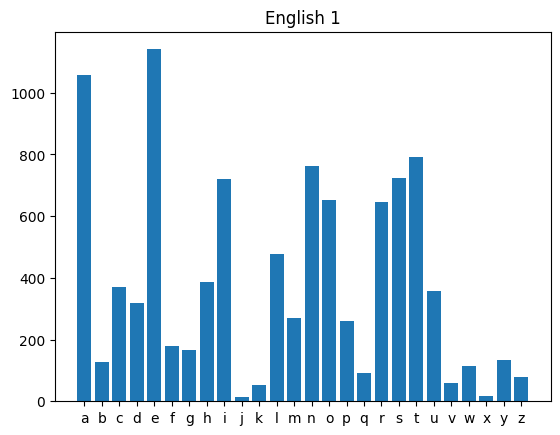

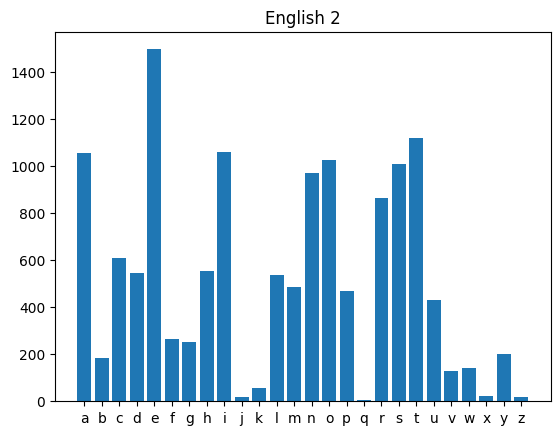

In [ ]:
unigram_eng1 = Counter(ngrams(eng1,1))
plothistogram(unigram_eng1)
plt.title('English 1')
plt.show()

unigram_eng2 = Counter(ngrams(eng2,1))
plothistogram(unigram_eng2)
plt.title('English 2')
plt.show()

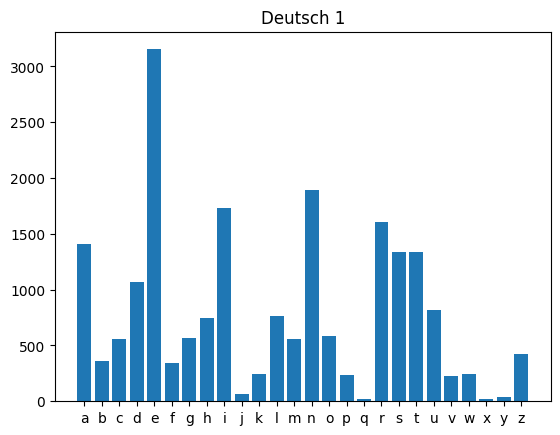

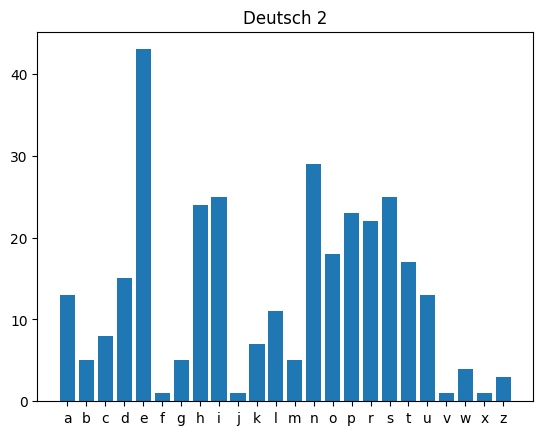

In [ ]:
unigram_de1 = Counter(ngrams(de1,1))
plothistogram(unigram_de1)
plt.title('Deutsch 1')
plt.show()

unigram_de2 = Counter(ngrams(de2,1))
plothistogram(unigram_de2)
plt.title('Deutsch 2')
plt.show()

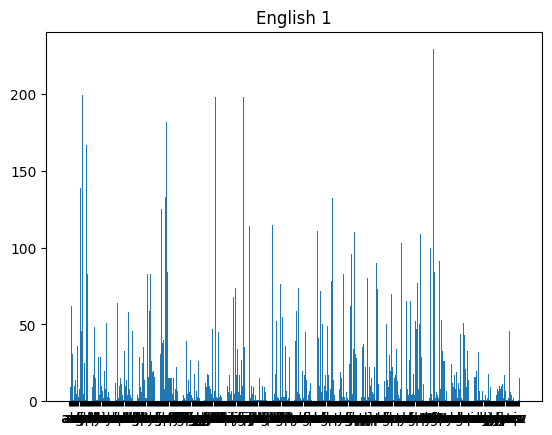

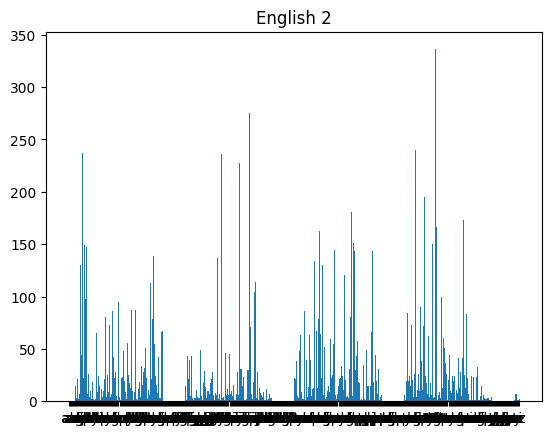

In [ ]:
bigram_eng1 = Counter(ngrams(eng1,2))
plothistogram(bigram_eng1)
plt.title('English 1')
plt.show()

bigram_eng2 = Counter(ngrams(eng2,2))
plothistogram(bigram_eng2)
plt.title('English 2')
plt.show()

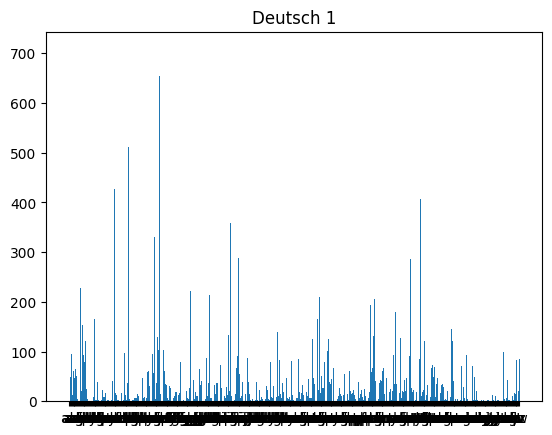

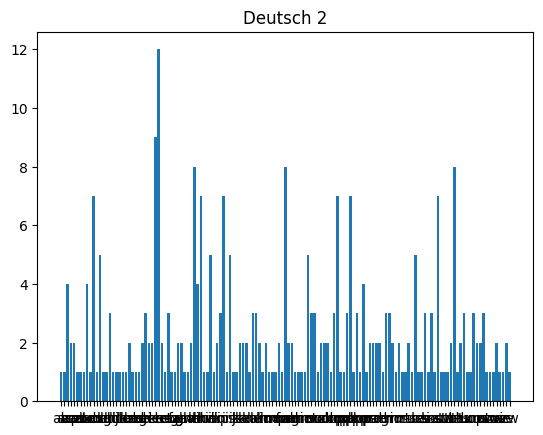

In [ ]:
bigram_de1 = Counter(ngrams(de1,2))
plothistogram(bigram_de1)
plt.title('Deutsch 1')
plt.show()

bigram_de2 = Counter(ngrams(de2,2))
plothistogram(bigram_de2)
plt.title('Deutsch 2')
plt.show()

In [ ]:
def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for i in range(26):
    for j in range(26):
      freq[i,j] = ngram[(chr(ord('a')+i), chr(ord('a')+j))]
  plt.imshow(freq, cmap = 'jet')
  return freq

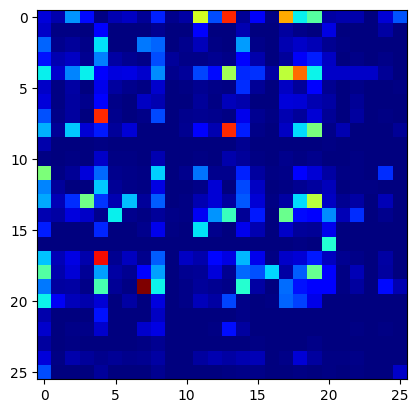

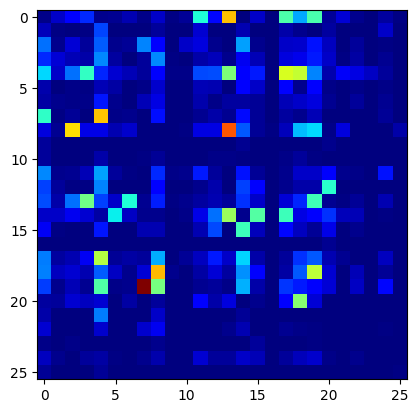

In [ ]:
bieng1 = plotbihistogram(bigram_eng1)
plt.show()
bieng2 = plotbihistogram(bigram_eng2)

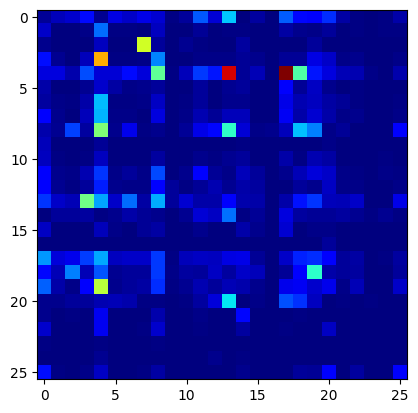

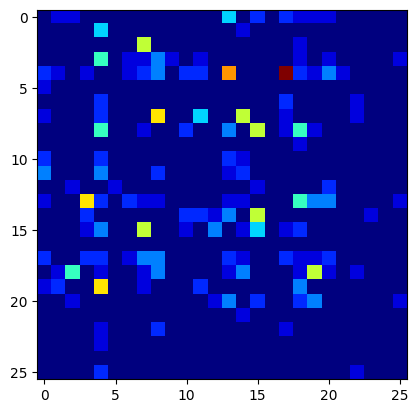

In [ ]:
bide1 = plotbihistogram(bigram_de1)
plt.show()
bide2 = plotbihistogram(bigram_de2)

10 ngrams for each text.

In [ ]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')

In [ ]:
print('English 1:')
ShowTopN(bieng1)
print('\nEnglish 2:')
ShowTopN(bieng2)

English 1:
('t', 'h') : 229.0
('r', 'e') : 205.0
('a', 'n') : 199.0
('i', 'n') : 198.0
('h', 'e') : 198.0
('e', 's') : 182.0
('a', 'r') : 167.0
('a', 'l') : 139.0
('e', 'r') : 133.0
('n', 't') : 132.0

English 2:
('t', 'h') : 336.0
('i', 'n') : 275.0
('s', 'i') : 240.0
('a', 'n') : 237.0
('h', 'e') : 236.0
('i', 'c') : 227.0
('e', 'r') : 206.0
('e', 's') : 197.0
('s', 't') : 195.0
('r', 'e') : 191.0


In [ ]:
print('Deutsch 1:')
ShowTopN(bide1)
print('\nDeutsch 2:')
ShowTopN(bide2)

Deutsch 1:
('e', 'r') : 708.0
('e', 'n') : 655.0
('d', 'e') : 512.0
('c', 'h') : 426.0
('t', 'e') : 407.0
('i', 'e') : 359.0
('n', 'd') : 343.0
('e', 'i') : 331.0
('e', 's') : 317.0
('i', 'n') : 289.0

Deutsch 2:
('e', 'r') : 12.0
('e', 'n') : 9.0
('t', 'e') : 8.0
('n', 'd') : 8.0
('h', 'i') : 8.0
('o', 'p') : 7.0
('p', 'h') : 7.0
('s', 't') : 7.0
('i', 'p') : 7.0
('h', 'o') : 7.0


Trigram

In [ ]:
def plothistogram_trigram(ngram):
  keys = list(ngram.keys())
  values = list(ngram.values())

  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  keys = key2string(keys)

  plt.figure(figsize=(10, 5))
  plt.bar(keys, values)
  plt.xticks(rotation=90)
  plt.tight_layout()
  plt.show()

In [ ]:
trigram_eng1 = Counter(ngrams(eng1, 3))
trigram_eng2 = Counter(ngrams(eng2, 3))

trigram_de1 = Counter(ngrams(de1, 3))
trigram_de2 = Counter(ngrams(de2, 3))

In [ ]:
def ShowTopN_trigram(trifreq, n=10):
  sorted_trigrams = sorted(trifreq.items(), key=lambda item: item[1], reverse=True)
  for i in range(min(n, len(sorted_trigrams))):
      trigram, freq = sorted_trigrams[i]
      print(f'{"".join(trigram)} : {freq}')

English 1:
the : 181
are : 105
and : 81
squ : 77
qua : 77
uar : 76
ent : 65
pla : 62
ing : 55
res : 46

English 1 Trigram Histogram:


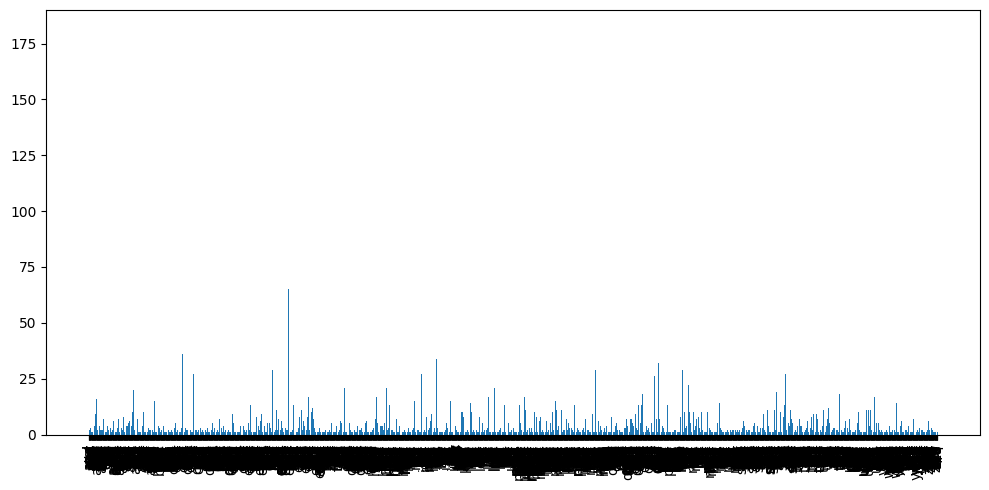


English 2:
the : 218
sic : 136
usi : 134
mus : 131
and : 127
pop : 122
ing : 90
opm : 65
ion : 62
pmu : 60

English 2 Trigram Histogram:


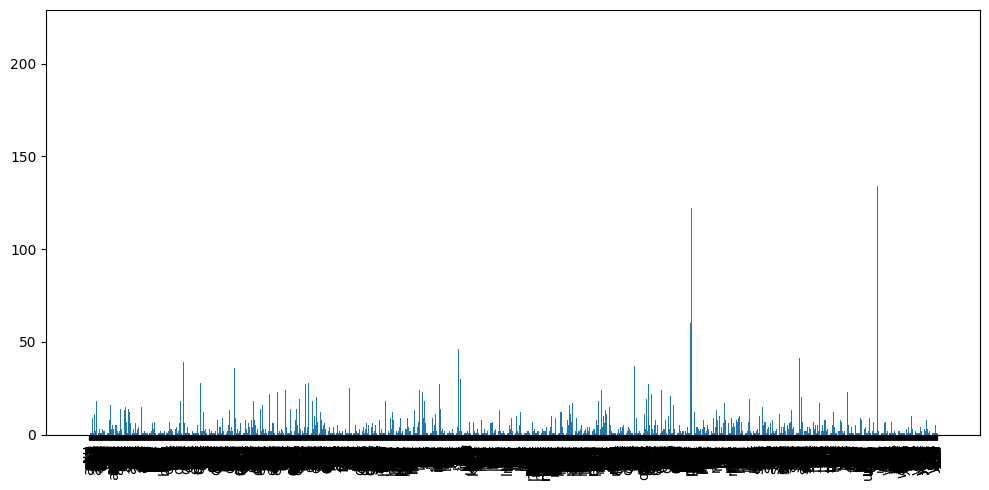

In [ ]:
print('English 1:')
ShowTopN_trigram(trigram_eng1)

print('\nEnglish 1 Trigram Histogram:')
plothistogram_trigram(trigram_eng1)

print('\nEnglish 2:')
ShowTopN_trigram(trigram_eng2)
print('\nEnglish 2 Trigram Histogram:')
plothistogram_trigram(trigram_eng2)

Deutsch 1:
der : 225
sch : 168
nde : 147
die : 144
che : 142
ein : 131
und : 109
ich : 108
sta : 93
ten : 92

Deutsch 1 Trigram Histogram:


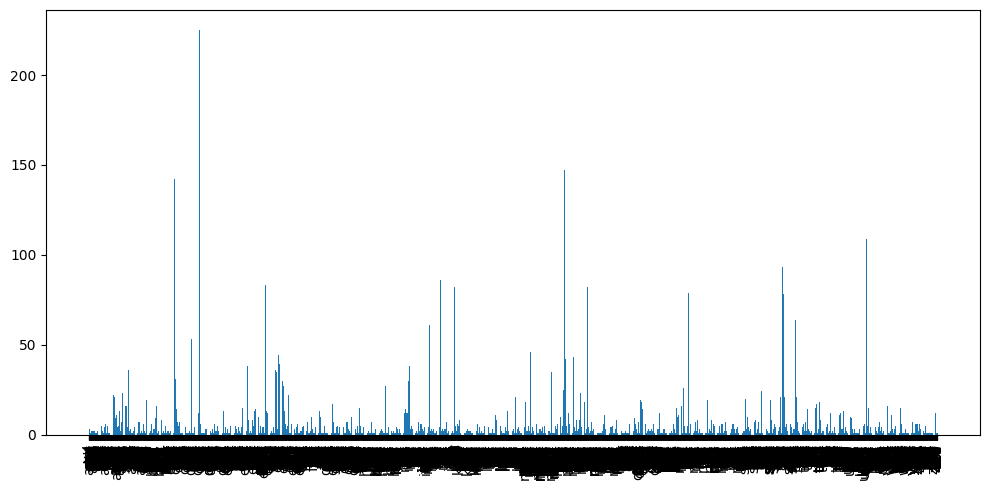


Deutsch 2:
hip : 7
iph : 7
pho : 7
hop : 7
sch : 5
chl : 4
ist : 3
ste : 3
opm : 3
deu : 3

Deutsch 2 Trigram Histogram:


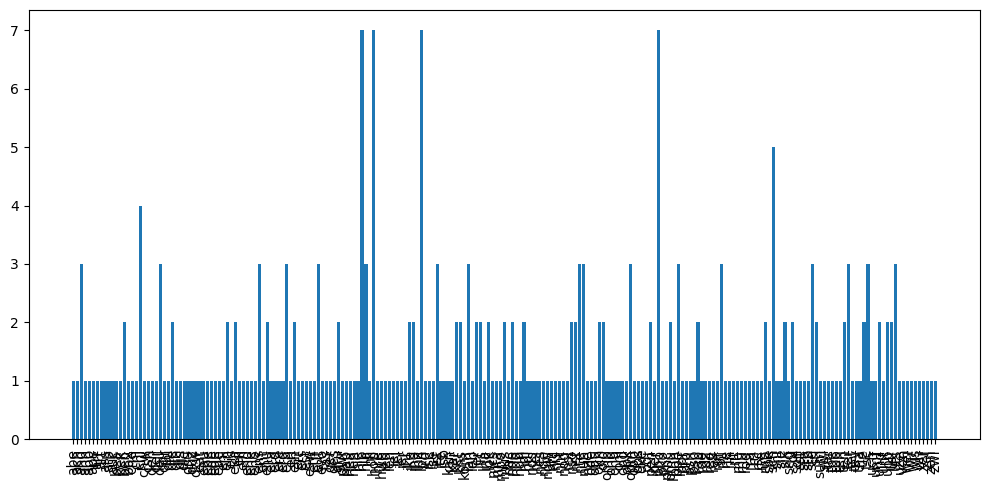

In [ ]:
print('Deutsch 1:')
ShowTopN_trigram(trigram_de1)
print('\nDeutsch 1 Trigram Histogram:')
plothistogram_trigram(trigram_de1)

print('\nDeutsch 2:')
ShowTopN_trigram(trigram_de2)
print('\nDeutsch 2 Trigram Histogram:')
plothistogram_trigram(trigram_de2)

# Part 2: Written numbers

We will use a subset of the MNIST dataset. Each input character is represented in a 28*28 array. Let us see if we can extract some simple features from these images which can help us distinguish between the digits.

Load the dataset:

In [ ]:
from keras.datasets import mnist

(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [ ]:
no5 = train_X[train_y==5,:,:]
no6 = train_X[train_y==6,:,:]

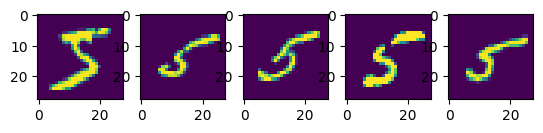

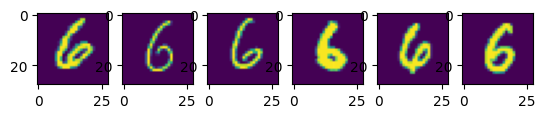

In [ ]:
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no5[ii,:,:])
plt.show()

for ii in range(6):
  plt.subplot(1, 6, ii+1)
  plt.imshow(no6[ii,:,:])
plt.show()

Now, let us start with a simple feature: the sum of all pixels and see how good this feature is.

In [ ]:
sum5 = np.sum(no5>0, (1,2))
sum6 = np.sum(no6>0, (1,2))

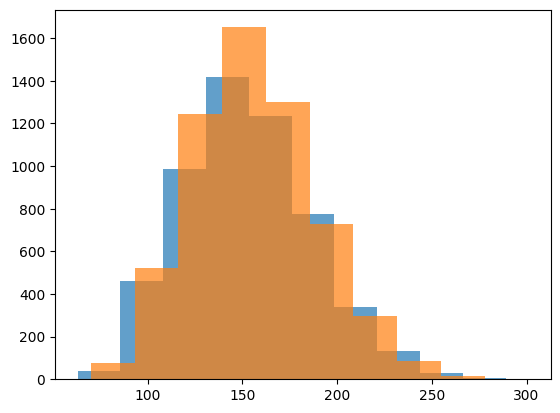

In [ ]:
plt.hist(sum5, alpha=0.7);
plt.hist(sum6, alpha=0.7);

In [ ]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]
  img2 = img2>0
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3)
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4
  hole = hull & ~ (img>0)
  return hole

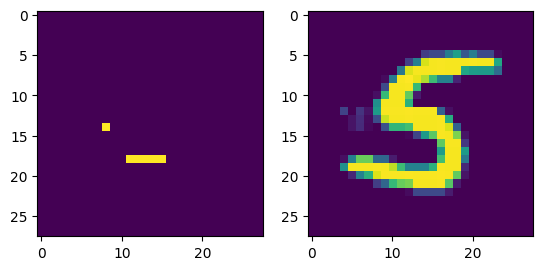

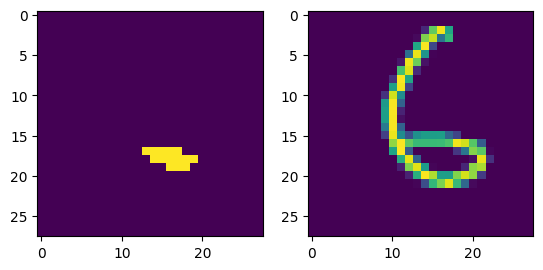

In [ ]:
imgs = [no5[456,:,:],  no6[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

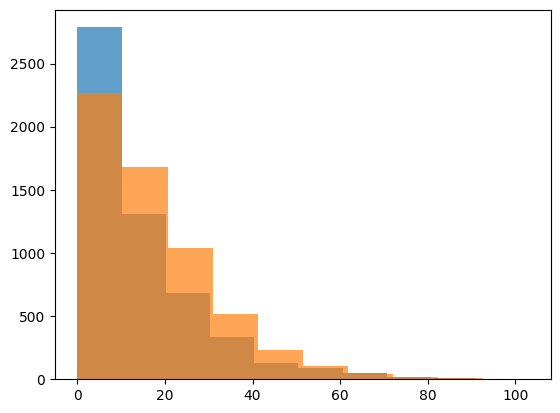

In [ ]:
hole5 = np.array([getHolePixels(i).sum() for i in no5])
hole6 = np.array([getHolePixels(i).sum() for i in no6])

plt.hist(hole5, alpha=0.7);
plt.hist(hole6, alpha=0.7);

In [ ]:
def getHullPixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3)
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4
  return hull

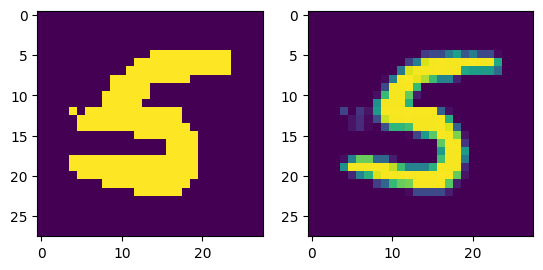

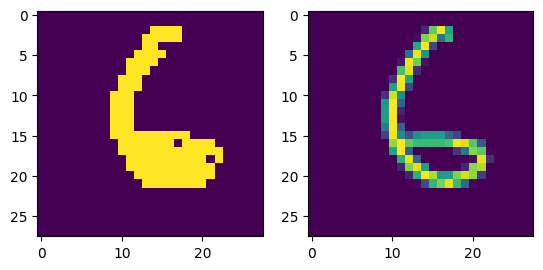

In [ ]:
imgs = [no5[456,:,:],  no6[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHullPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

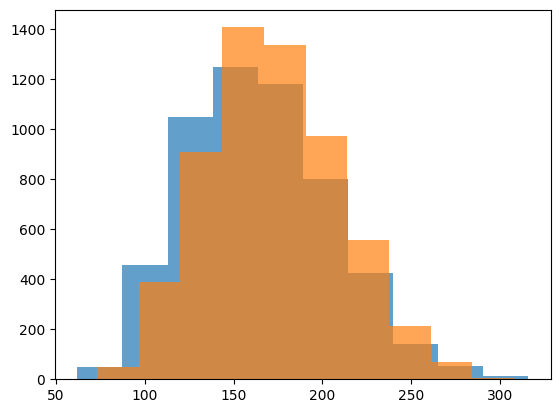

In [ ]:
hull5 = np.array([getHullPixels(i).sum() for i in no5])
hull6 = np.array([getHullPixels(i).sum() for i in no6])

plt.hist(hull5, alpha=0.7);
plt.hist(hull6, alpha=0.7);

In [ ]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

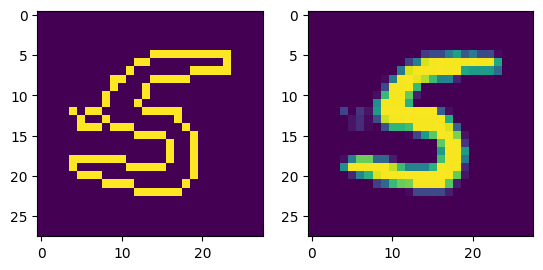

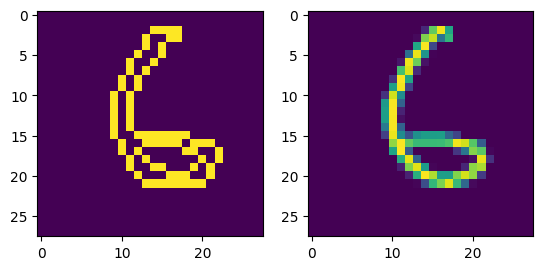

In [ ]:
imgs = [no5[456,:,:],  no6[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

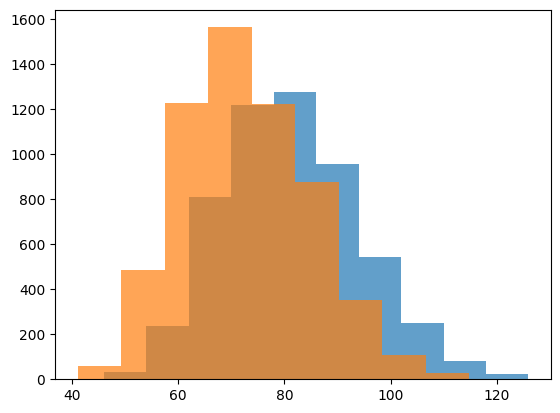

In [ ]:
bound5 = np.array([getBoundaryPixels(i).sum() for i in no5])
bound6= np.array([getBoundaryPixels(i).sum() for i in no6])

plt.hist(bound5, alpha=0.7);
plt.hist(bound6, alpha=0.7);

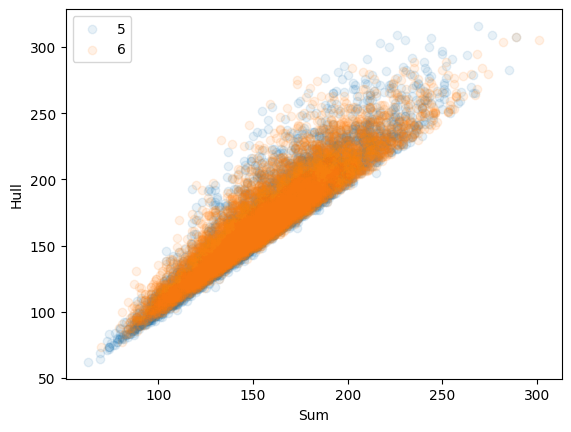

In [ ]:
plt.scatter(sum5, hull5, alpha=0.1)
plt.scatter(sum6, hull6, alpha=0.1)
plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['5','6'])
plt.show()

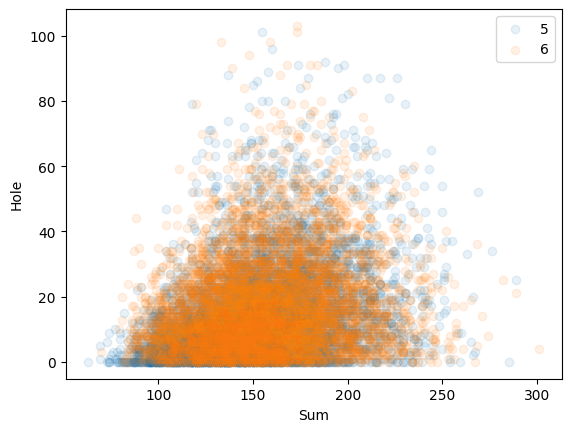

In [ ]:
plt.scatter(sum5, hole5, alpha=0.1)
plt.scatter(sum6, hole6, alpha=0.1)
plt.xlabel('Sum');
plt.ylabel('Hole');
plt.legend(['5','6'])
plt.show()

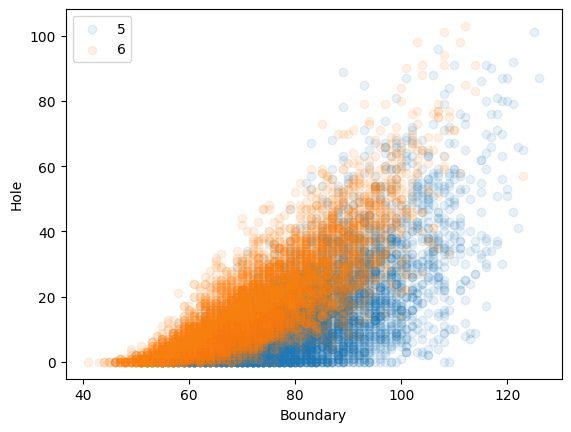

In [ ]:
plt.scatter(bound5, hole5, alpha=0.1)
plt.scatter(bound6, hole6, alpha=0.1)
plt.xlabel('Boundary');
plt.ylabel('Hole');
plt.legend(['5','6'])
plt.show()

In [ ]:
cl5 = ['class 5']*len(sum5)
cl6 = ['class 6']*len(sum6)
df = pd.DataFrame(list(zip(np.concatenate((hole5, hole6)), np.concatenate((sum5,sum6)),
                           np.concatenate((bound5,bound6)), np.concatenate((cl5, cl6)))),
               columns =['Hole', 'Sum', 'Boundary', 'Class'])
df.head()
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.1)
fig.show()